### Workflow


1. Definição do problema
2. Carregar dados de treinamento e test
3. Preparar e limpar os dados
4. Analisar, identificar padrões e explorar os dados
5. Treinar o primeiro algoritmo de Machine Learning


# Definição do problema

A partir dos dados de quem sobreviveu e não sobreviveu ao desastre do Titanic em 15 de Abril de 1912, conseguimos criar um modelo que baseado nestes dados consegue indentificar padrões dos sobreviventes?


In [1]:
# Análise de dados
import pandas as pd
import numpy as np
import random as rnd

# visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
!mkdir data
!wget -L https://raw.githubusercontent.com/pedrocwb/pos-fiep/master/data/test.csv -P data/
!wget -L https://raw.githubusercontent.com/pedrocwb/pos-fiep/master/data/train.csv -P data/

mkdir: data: File exists
dyld: Library not loaded: /usr/local/opt/openssl@1.1/lib/libssl.1.1.dylib
  Referenced from: /usr/local/bin/wget
  Reason: image not found
dyld: Library not loaded: /usr/local/opt/openssl@1.1/lib/libssl.1.1.dylib
  Referenced from: /usr/local/bin/wget
  Reason: image not found


# Carregamento dos dados

Neste exercicio iremos carregar os dados de arquivos CSV, mas os dados podem vir de diversas outras fontes como bancos de dados relacionais,
storages de dados não estruturados, podem ser videos ou imagens. Dependendo do tipo de dado precisaremos utilizar diferentes bibliotecas e 
APIs para carregar os dados em memória. 


In [3]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

**Vamos visualizar como o dado está estruturado** 

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Quais são os tipo das caracateristicas? (Inteiro, String)**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Qual é a distribuição dos variáveis númericas no nosso dataset?**
Esse tipo de informação pode nos fornecer alguns insights iniciais para a resolução do nosso problema.


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Média de passageiros que sobreviveram por cada Classe

In [8]:
(
 train_df[['Pclass', 'Survived']]
    .groupby(['Pclass'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


média de passageiros que sobreviveram por sexo

In [9]:
(
    train_df[["Sex", "Survived"]]
        .groupby(['Sex'], as_index=False)
        .mean()
        .sort_values(by='Survived', ascending=False)
)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Média de passageiros que sobreviveram dado a quantidade de irmãos/companheiros abordo (sibsp)

In [10]:
# Seu código aqui

Média de passageiros que sobreviveram dado a quantidade de Pais/criancas pequenas abordo (parch)

In [11]:
# Seu código aqui

### Analisando os dados através de visualização

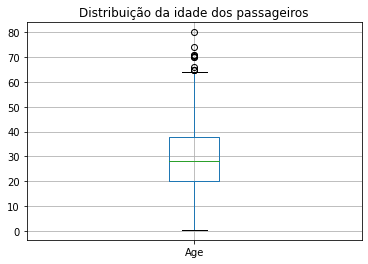

In [12]:
g = train_df[["Age"]].boxplot()
_ = g.set_title("Distribuição da idade dos passageiros")

### Faça o boxplot da distribuição dos preços presentes no train_df

In [13]:
#Seu código aqui



#### Correlacionar as variáveis numéricas

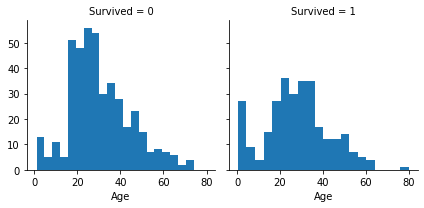

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- As crianças tiverem uma melhor taxa de sobrevivencia?
- Devemos considerar a variável idade no nosso modelo?

Faça o mesmo gráfico acima para a variável Fare

In [15]:
# Seu código aqui

### Correlacionando as variáveis ordinais

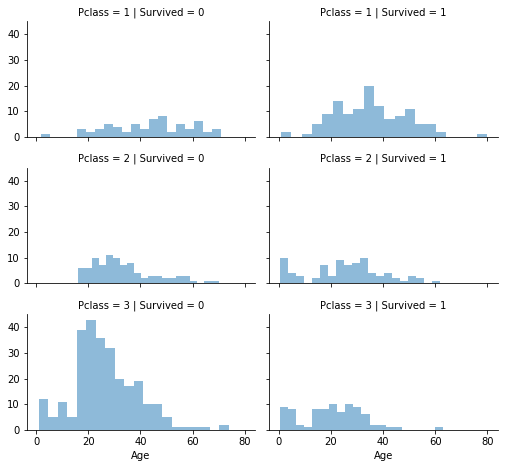

In [16]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20);
grid.add_legend();

Devemos considerar essa variável para o nosso modelo?

Taxa de sobrevivencia por sexo, classe e portão de embarque

(C = Cherbourg; Q = Queenstown; S = Southampton)

/Users/pedro/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/pedro/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


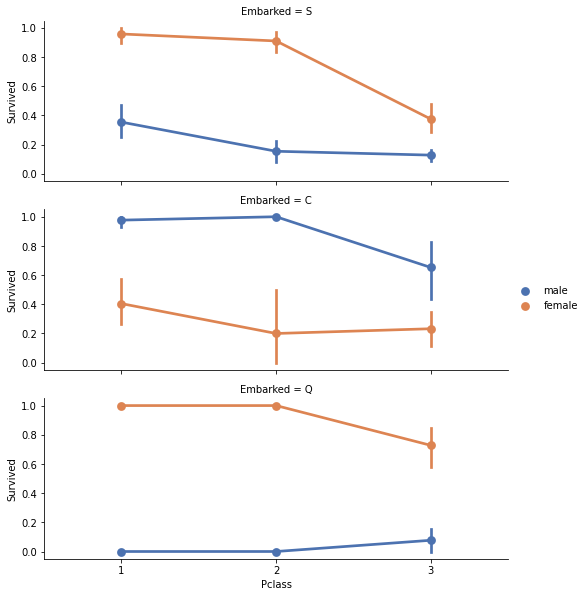

In [17]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.8, aspect=2.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep',)
grid.add_legend();

Devemos considerar a variável Sexo e Portão de Embarque em nosso Modelo?

 ### Correlacionando variáveis categóricas e numéricas

/Users/pedro/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/pedro/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


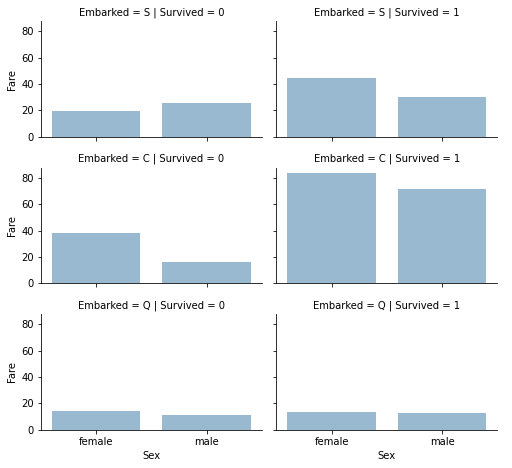

In [18]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();


### Feature Engineering

Feature engineering é o termo utilizado para definir um conjunto de técnicas utilizado na criação e manipulação de features (recursos), tendo como objetivo desenvolver um bom modelo de aprendizado de máquina.Você também pode conhecer essa etapa como pré-processamento de dados, embora muitos entendam o feature engineering faça parte dele. Essa é uma das fases mais importantes do processo de construção de um modelo preditivo. 

Porém, feature engineering não se trata apenas de selecionar bons recursos para um modelo. Esse processo também abrange a transformação matemática nas features existentes para extrair o máximo potencial dos dados e criação de novas features. Neste artigo vou trazer as técnicas mais utilizadas.

#### Remover variáveis com poucas observações ou que não possuem um significado para o modelo



In [19]:
train_df["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [20]:
train_df["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

Taxa de valores nulos na variável Cabin

In [21]:
train_df["Cabin"].isnull().sum() / train_df.shape[0]

0.7710437710437711

Removendo as variáveis Ticket e Cabin

In [22]:
print("Antes", train_df.shape, test_df.shape)

Antes (891, 12) (418, 11)


In [23]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [24]:
print("Depois", train_df.shape, test_df.shape)

Depois (891, 10) (418, 9)


### Criando novas caracteristicas a partir das existentes

In [25]:
train_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Extrair o titulo de cada pessoa pode trazer mais informacoes para o nosso modelo

In [26]:
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [27]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Podemos substituir muitos titulos com um nome mais comum ou classificar eles como raros

In [28]:
for dataset in [train_df, test_df]:
    dataset['Title'] = \
        dataset['Title']\
            .replace(
                ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
            'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


E por fim vamos mapear estes titulos para números ordinais

In [29]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Feito isso podemos remover os as colunas Name e Passagener ID

In [30]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
train_df.shape, test_df.shape

((891, 9), (418, 9))

#### Vamos agora converter as variávies que são texto para numéricos

Vamos converter a variável **Embarked** para numérica. Para isso precisamos 
preencher os valores nulos presente no dataset. 

(C = Cherbourg; Q = Queenstown; S = Southampton)

In [31]:
# porto mais frequente
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [32]:
for dataset in [train_df, test_df]:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
(train_df[['Embarked', 'Survived']]
    .groupby(['Embarked'], as_index=False)
    .mean().sort_values(by='Survived', ascending=False))

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for dataset in [train_df, test_df]:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,1,3
2,1,3,female,26.0,0,0,7.9250,0,2
3,1,1,female,35.0,1,0,53.1000,0,3
4,0,3,male,35.0,0,0,8.0500,0,1


Agora vc! Converta a variável Sex para numérica da mesma maneira como fizemos acima. 

In [61]:
# Seu código aqui

#### Vamos completar as variáveis numéricas continuas

In [41]:
train_df["Age"].isna().sum() / train_df.shape[0]

0.19865319865319866

- ~20% dos nossos dados não possuem o dado idade. Será que conseguimos "chutar" uma idade para esses passageiros?


Existe algumas estratégias de **Imputation** que podemos usar aqui

    1. Gerar valores aleatories baseado numa média e desvio padrão
    2. Uma maneira mais acurada de gerar estes valores é observar outras variáveis que se correlacionam com o a variável idade. No nosso caso, notamos uma correlação entre Idade, Genero e PClass (classe). Podemos gerar valores mais próximos aos reais se nos valermos destas correlacoes.


/Users/pedro/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


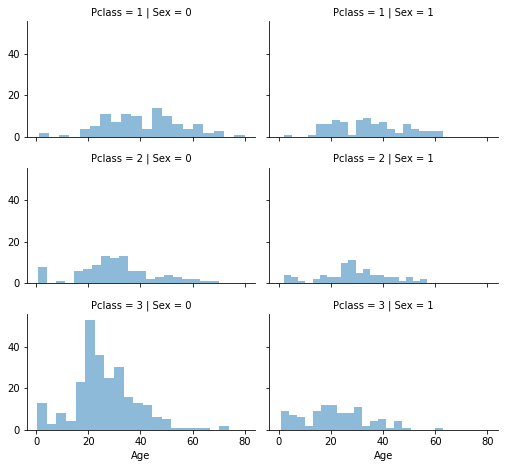

In [42]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [43]:
idades = np.zeros((2,3))
idades

array([[0., 0., 0.],
       [0., 0., 0.]])

In [44]:
for dataset in [train_df, test_df]:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            idades[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ 
                    (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = idades[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,1,3
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,0,3
4,0,3,0,35,0,0,8.0500,0,1


Vamos agora fazer o binning da idade, ou seja, ao invés de usar a variável idade continua vamos discretiza-la em alguns intervalos

In [45]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
(train_df[['AgeBand', 'Survived']]
     .groupby(['AgeBand'], as_index=False)
     .mean()
     .sort_values(by='AgeBand', ascending=True)
)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [46]:
for dataset in [train_df, test_df]:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,1,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,0,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,0,1,"(32.0, 48.0]"


In [47]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


### Treinar Modelo de Machine Learning



Agora que preparamos os nossos dados, podemos escolher entre os mais de 60 algoritmos de machine learning existensta para resolver o nosso problema. No entanto, devemos entender o tipo de problema que temos para podemos escolher os algoritmos certos. 

Nosso problema é um problema de classificação e regressão. Queremos identificar a relação entre a o output (Survived) com as outras variáveis (Gender, Age, PClass...). Estamos também lidando com um uma categoria de machine learning chamado aprendizagem supervisionada - uma vez que estamos treinando nosso modelo com um dataset de treinamento.

Dado que o nosso problema é um problema de Classificação e Regressão de forma supervisonada podemos escolher algums modelos para resolver nosso problema. 



- KNN or k-Nearest Neighbors
- Support Vector Machines
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network




- Vamos extrair do dataset de treino a variável Survived. Você sabe dizer o porque?

In [56]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy().dropna()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (417, 8))

## Regressão Logistica


In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [58]:
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.46

## KNN

In [60]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.87